In [ ]:
!nvidia-smi

Sun Apr 14 12:45:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 5.42 MiB/s, done.
Resolving deltas: 100% (164/164), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.1 MB/s eta 0:00:00


## Download model weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Apr 11 09:32 .
drwxr-xr-x 1 root root      4096 Apr 11 09:32 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## yolov9-e

## Authenticate and Download the Dataset KVASIR

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


In [ ]:
from roboflow import Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ukPZdwMigTWdMflJsoHH")
project = rf.workspace("fyp-v6rcp").project("kvasir-kqkfx")
version = project.version(1)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 50 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-04-11 09:32:40.142304: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 09:32:40.142377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 09:32:40.143911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 09:32:41.278968: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/kvasir-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, nova

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/drive/MyDrive/yolov9/runs/train/exp

confusion_matrix.png				    PR_curve.png	 val_batch0_labels.jpg
events.out.tfevents.1712827962.55b084a5c300.2464.0  R_curve.png		 val_batch0_pred.jpg
F1_curve.png					    results.csv		 val_batch1_labels.jpg
hyp.yaml					    results.png		 val_batch1_pred.jpg
labels_correlogram.jpg				    roboflow_deploy.zip  val_batch2_labels.jpg
labels.jpg					    state_dict.pt	 val_batch2_pred.jpg
model_artifacts.json				    train_batch0.jpg	 weights
opt.yaml					    train_batch1.jpg
P_curve.png					    train_batch2.jpg


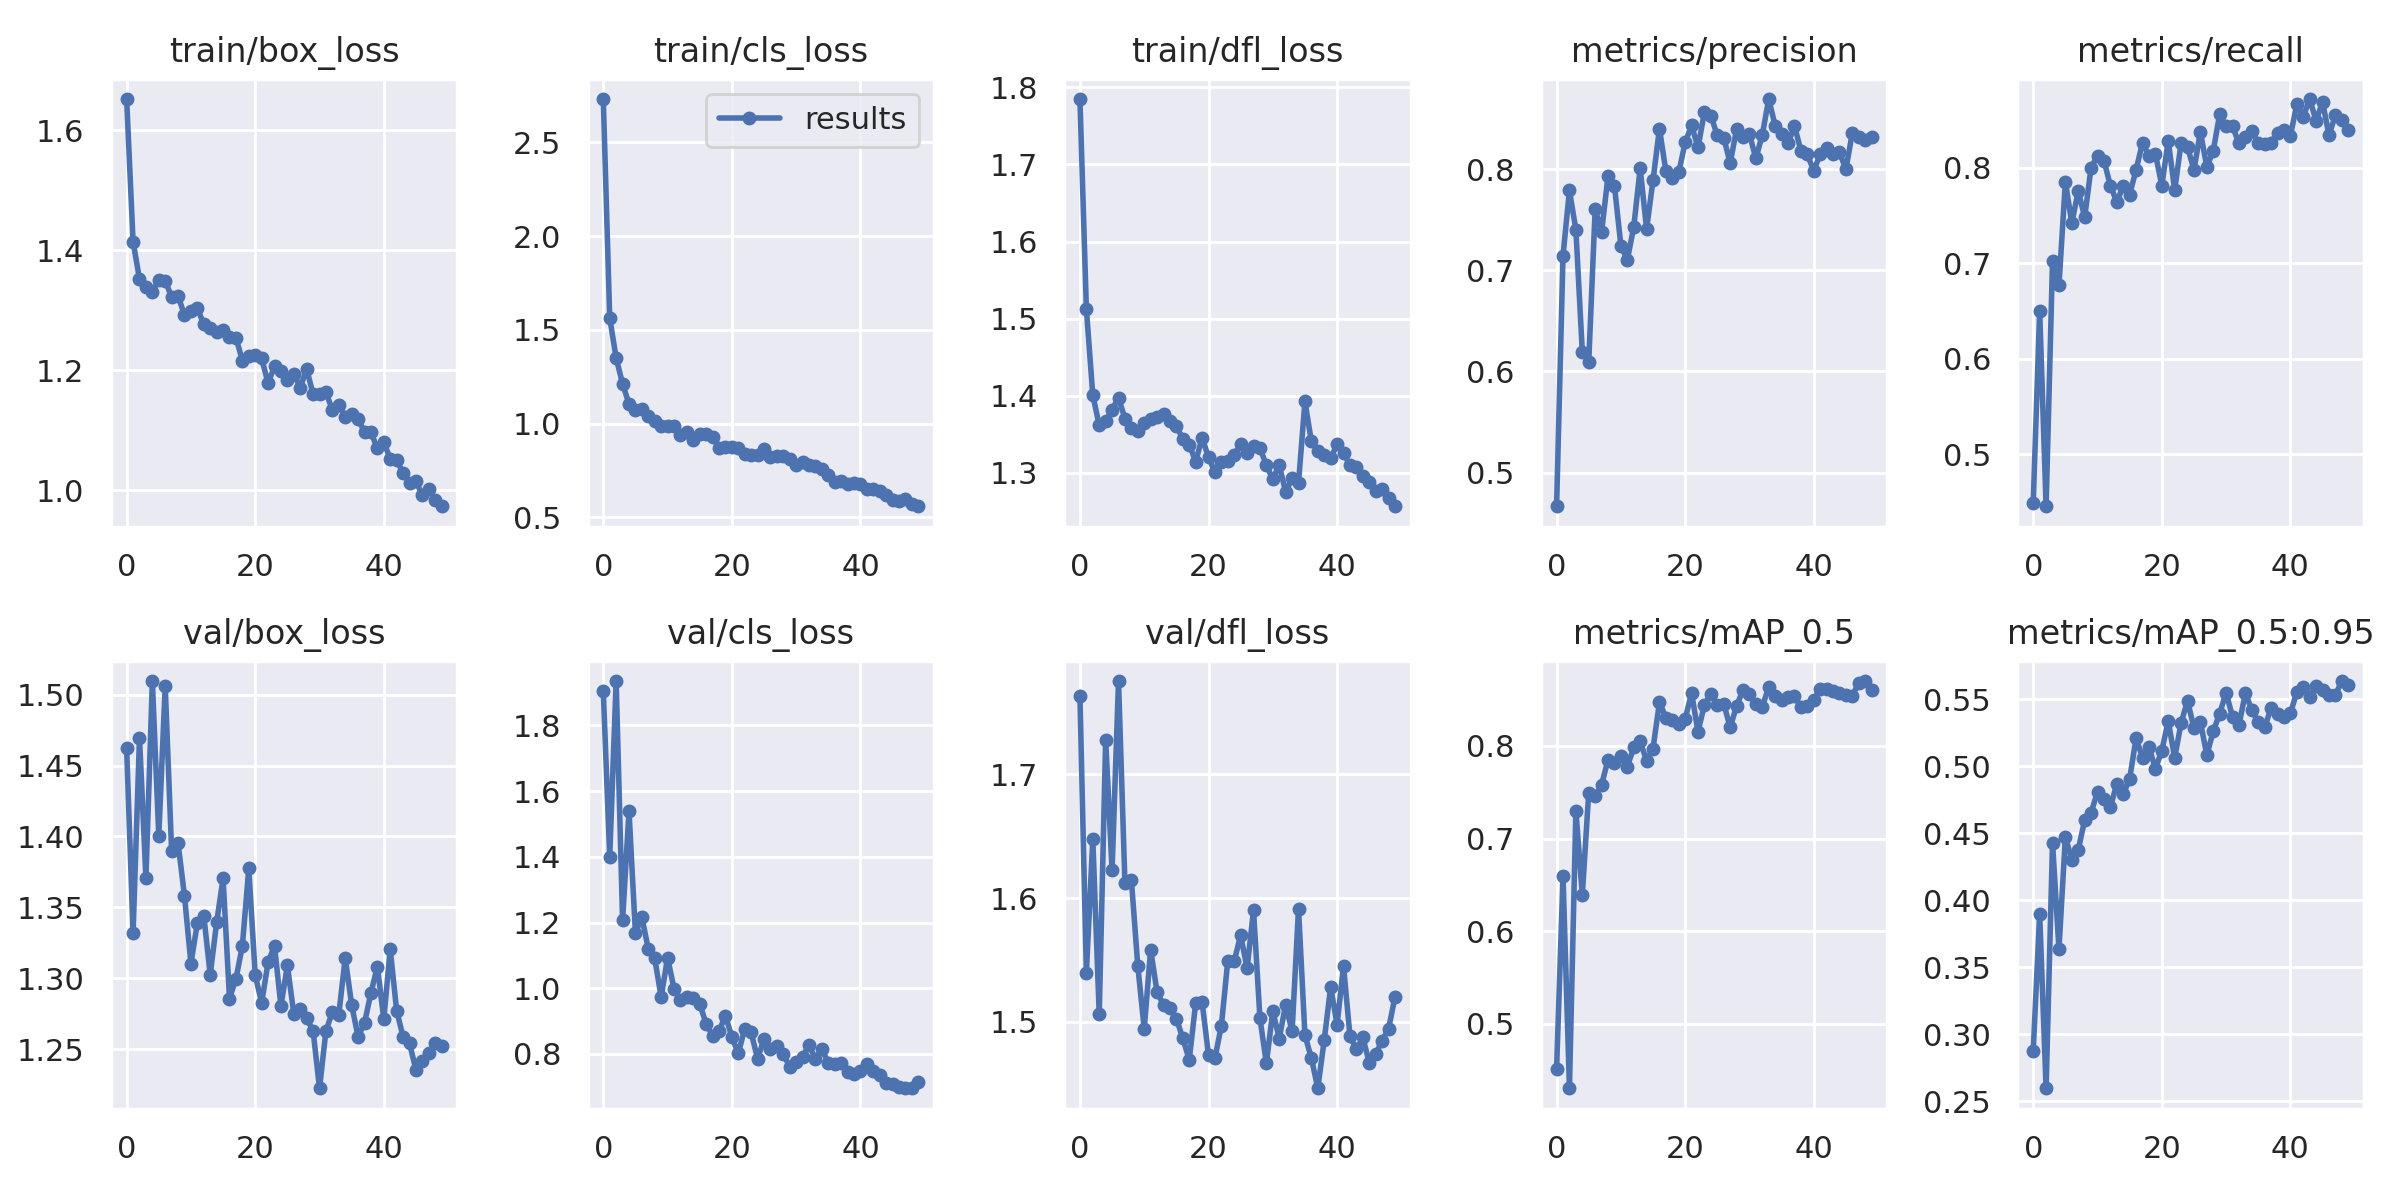

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/drive/MyDrive/yolov9/runs/train/exp/results.png", width=1000)

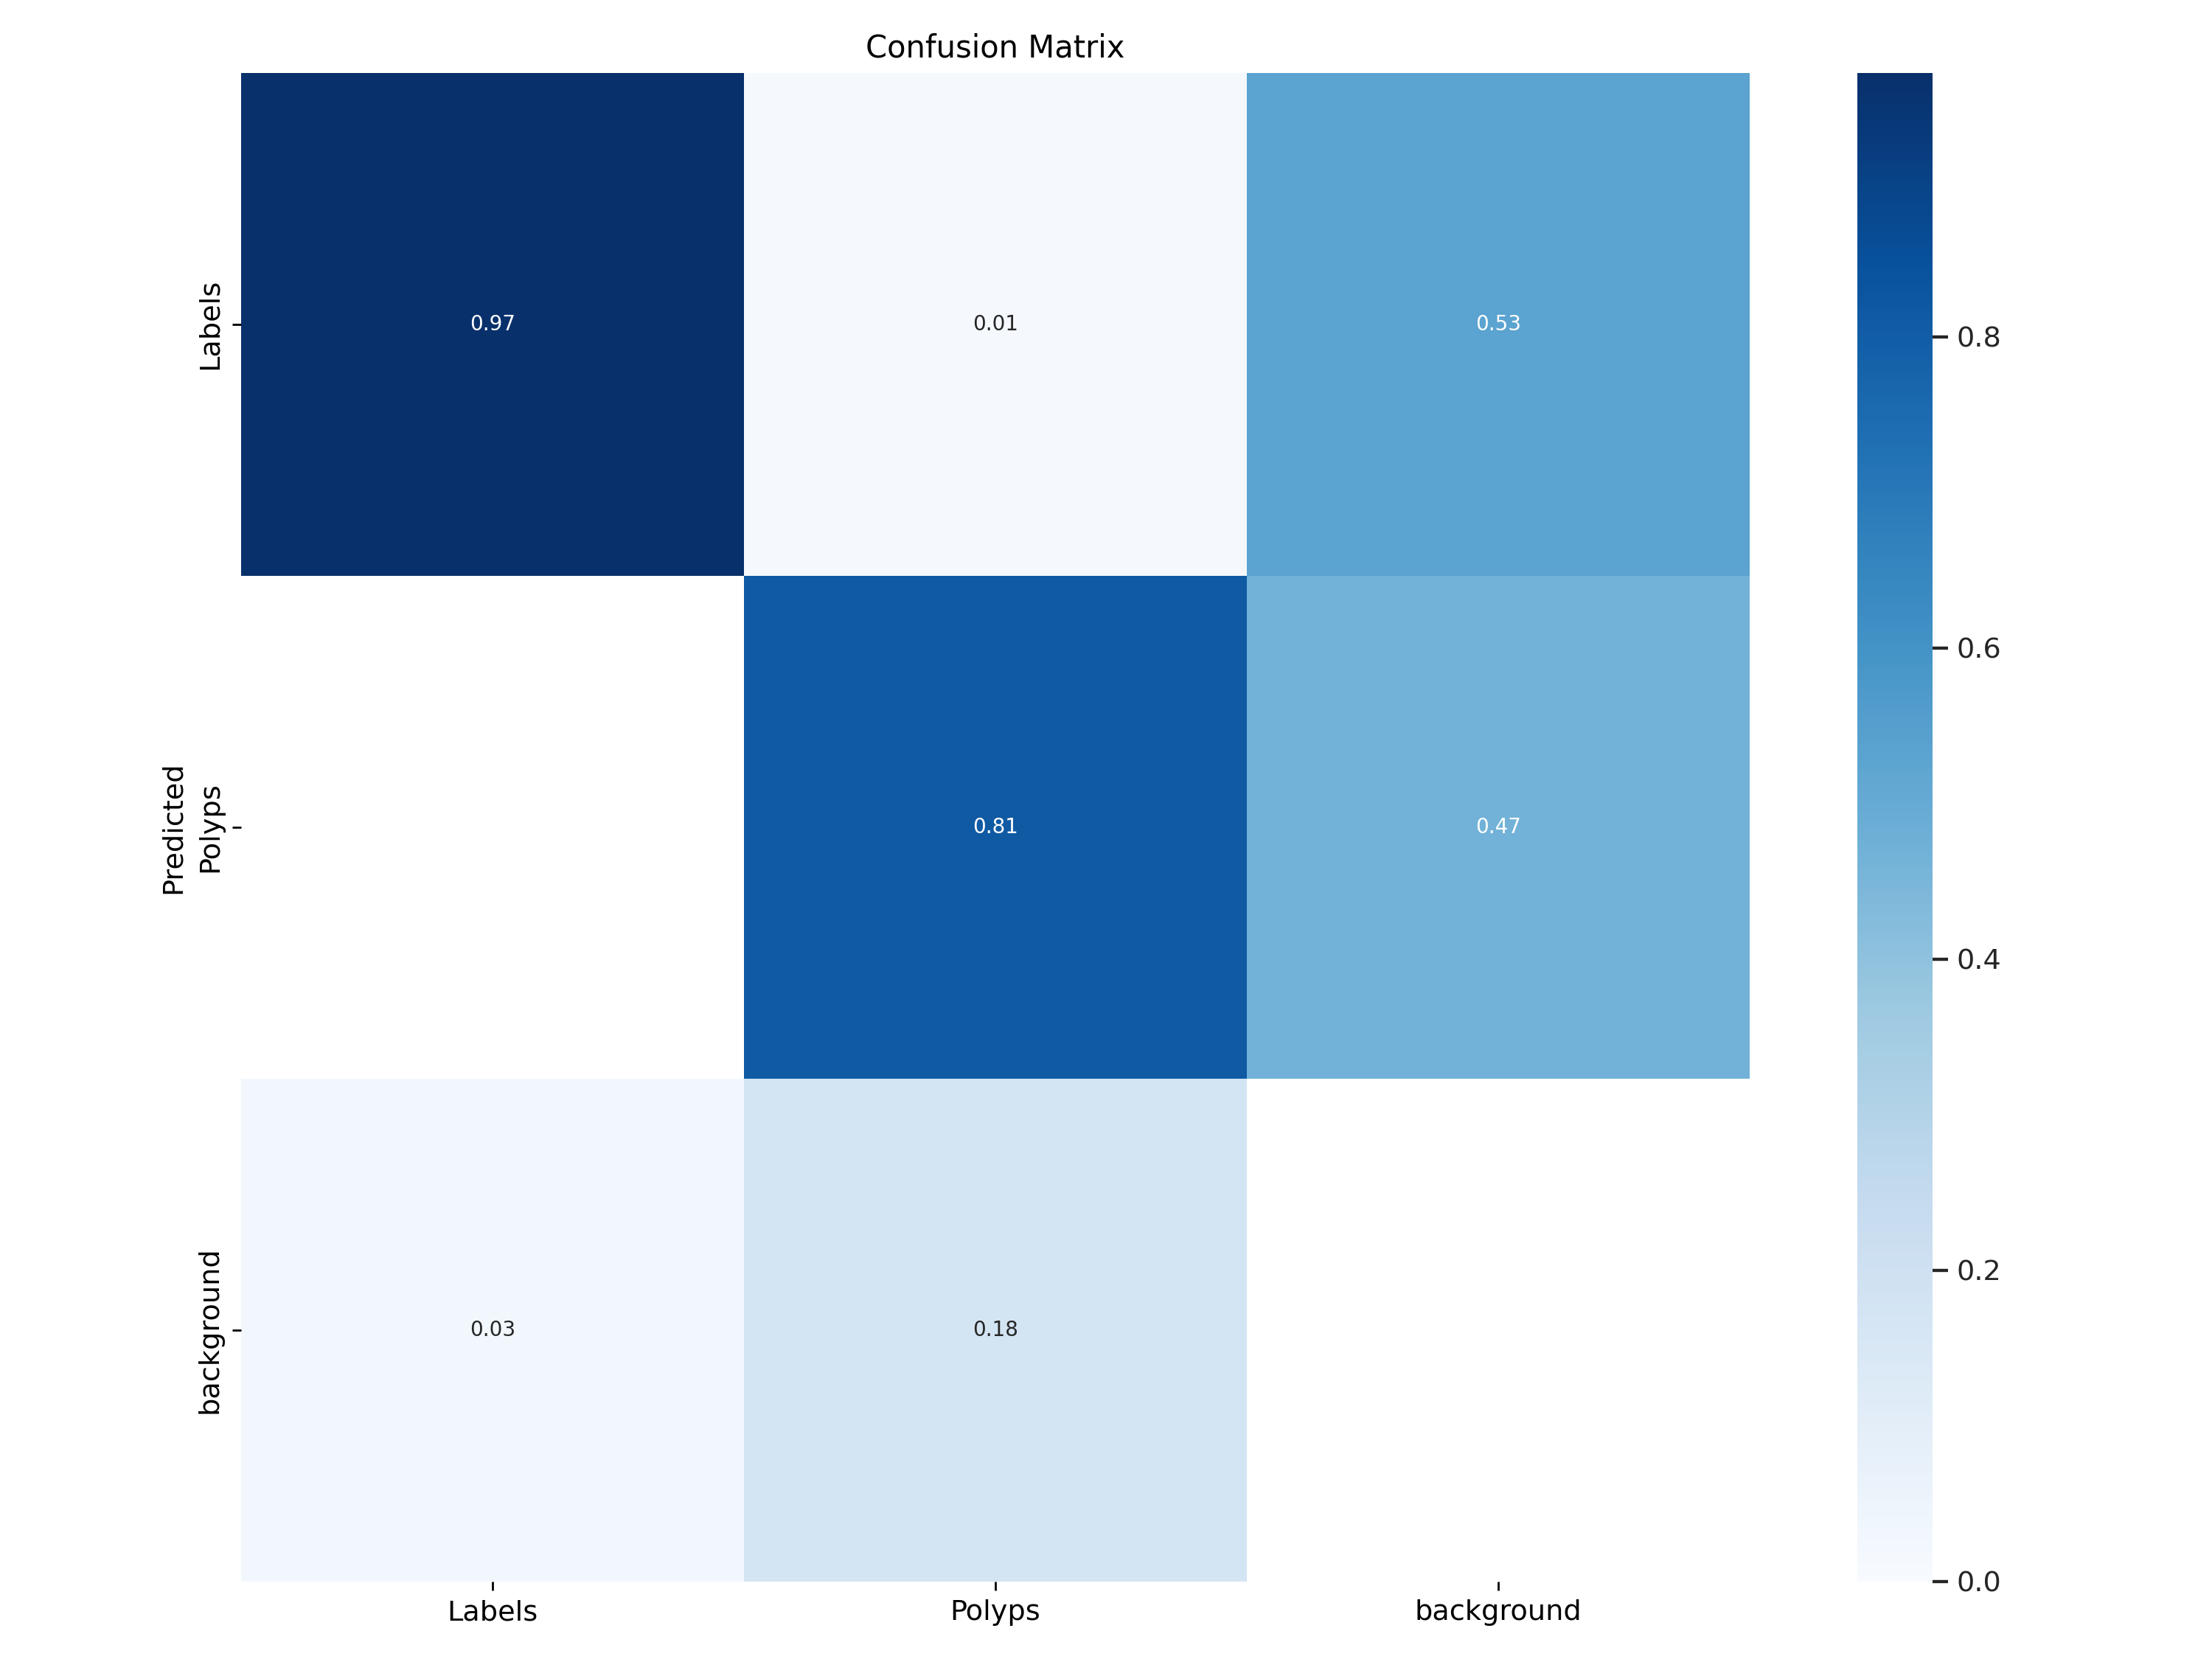

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/drive/MyDrive/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

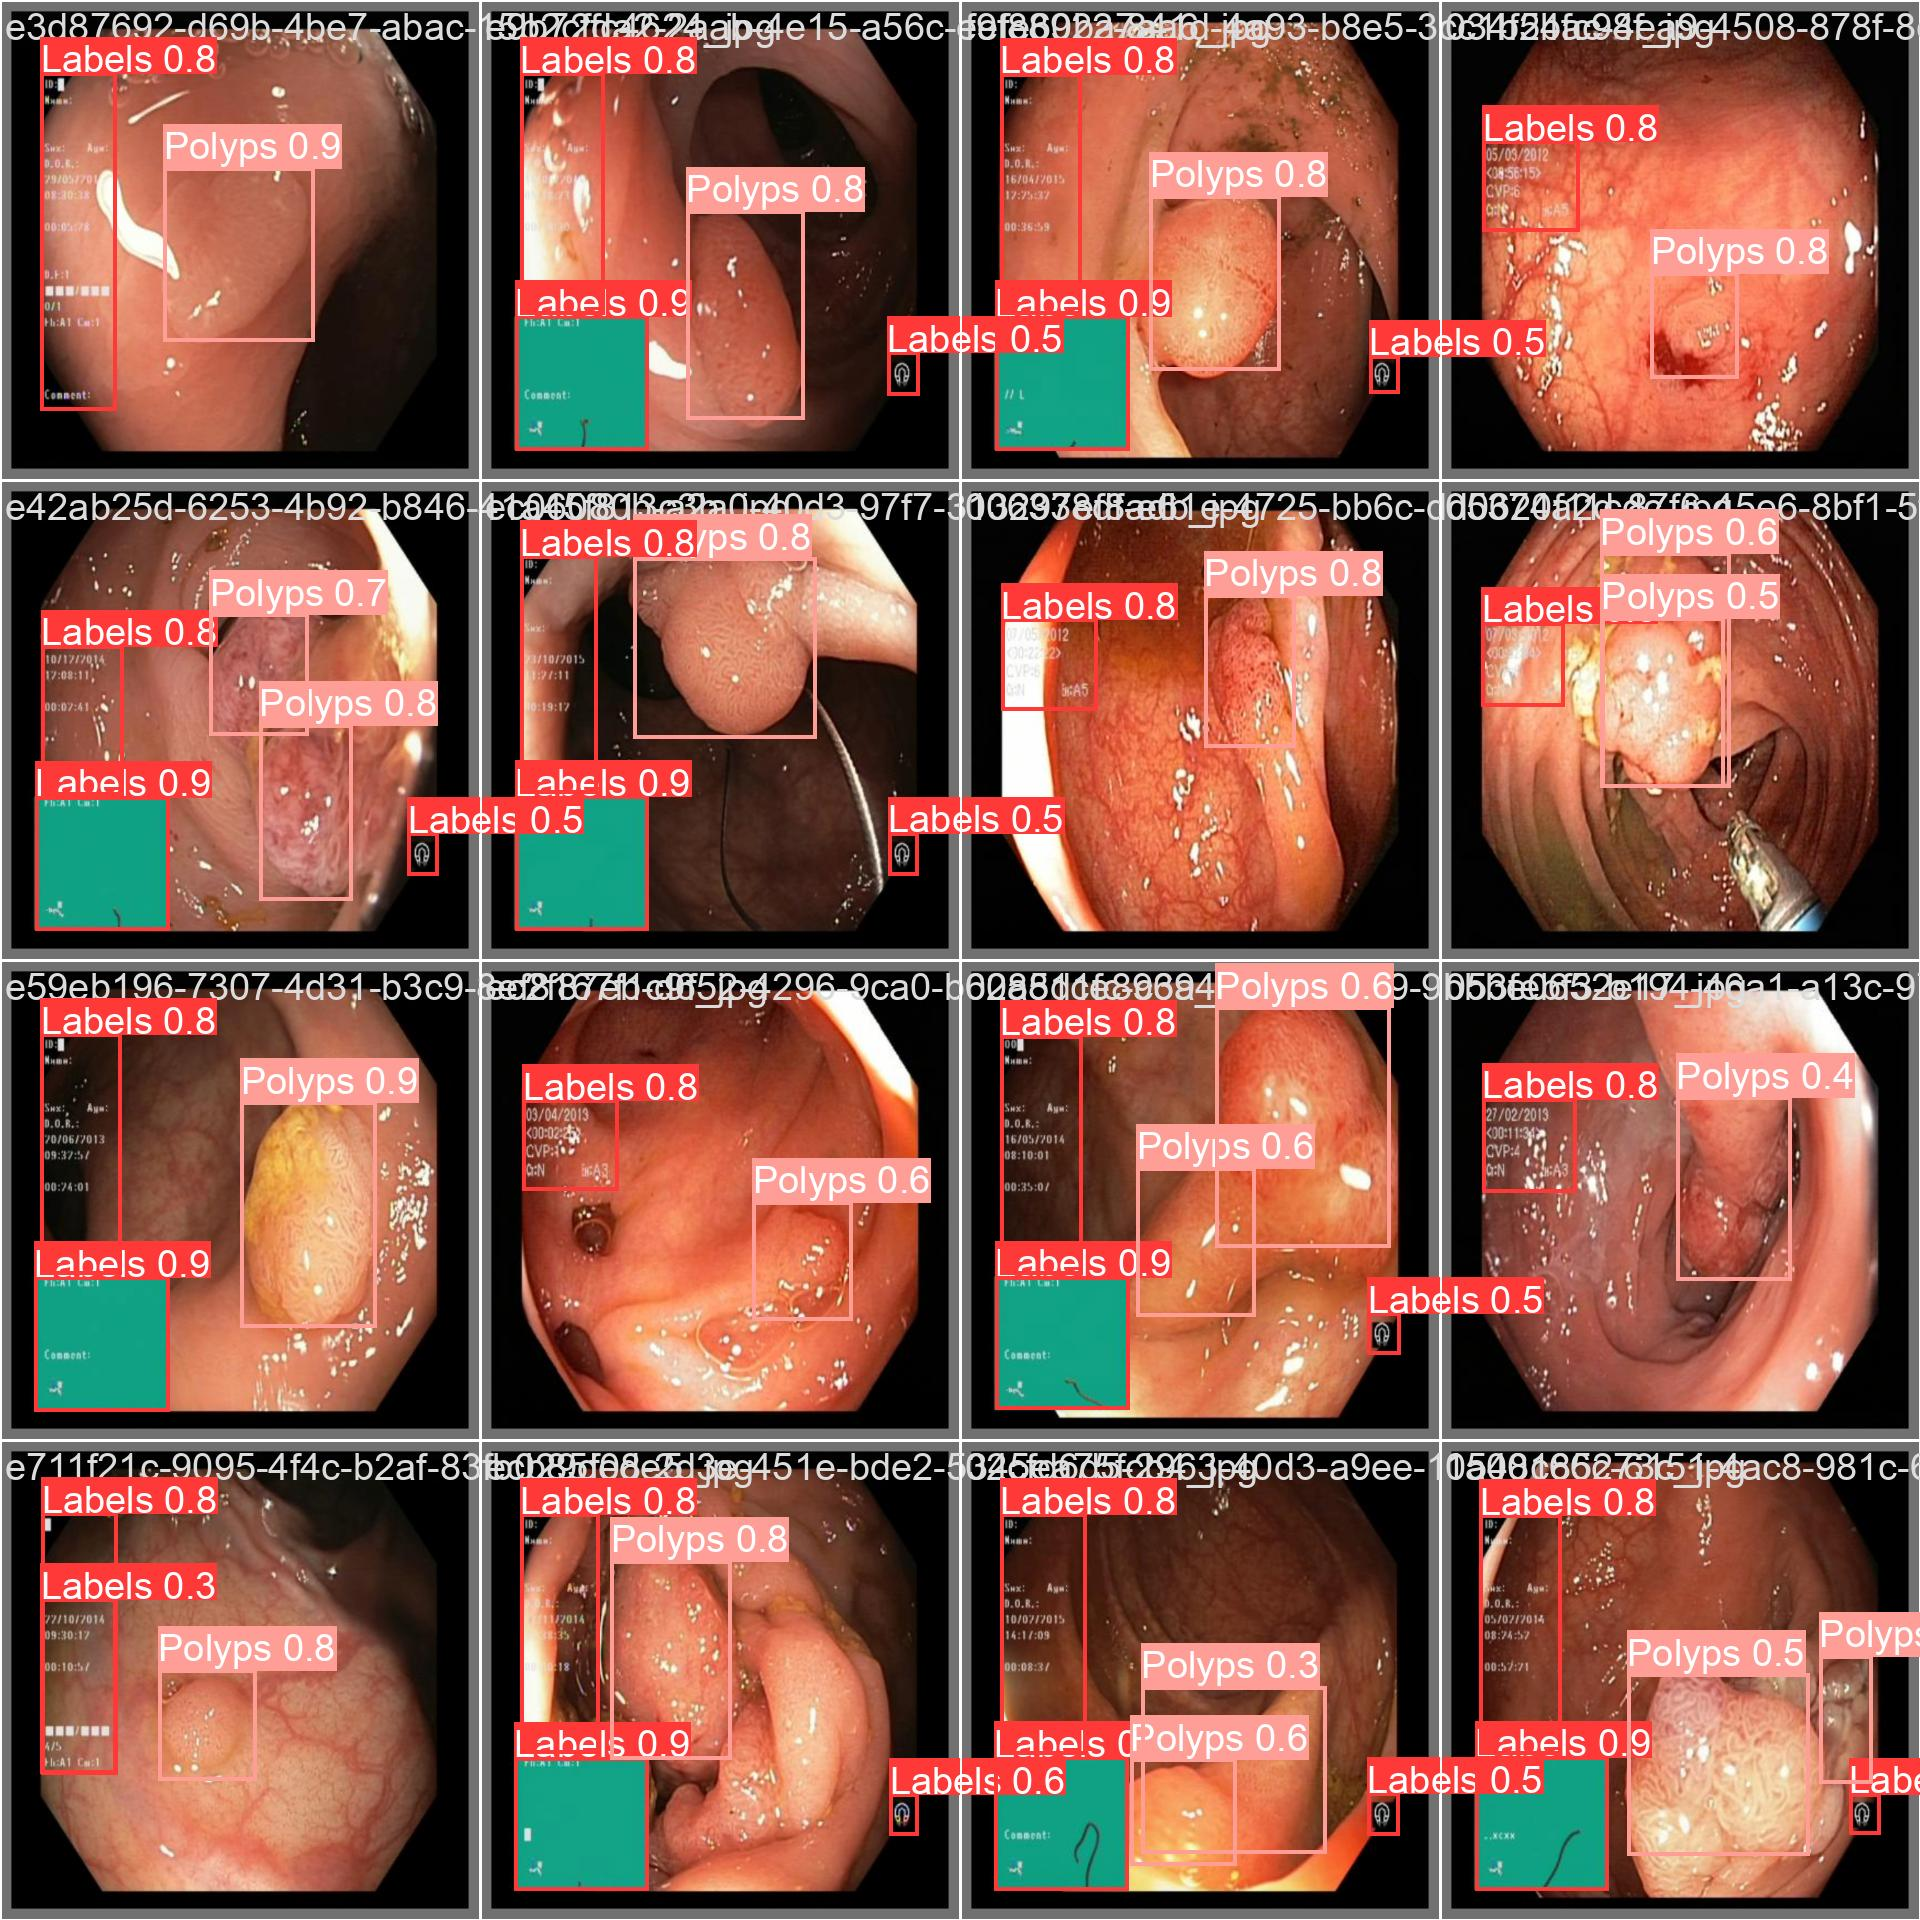

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/drive/MyDrive/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/drive/MyDrive/yolov9

!python /content/drive/MyDrive/yolov9/val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /content/drive/MyDrive/yolov9/kvasir-1/data.yaml \
--weights {HOME}/drive/MyDrive/yolov9/runs/train/exp/weights/best.pt

/content/drive/MyDrive/yolov9
val: data=/content/drive/MyDrive/yolov9/kvasir-1/data.yaml, weights=['/content/drive/MyDrive/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25412502 parameters, 0 gradients, 102.5 GFLOPs
100% 755k/755k [00:00<00:00, 26.3MB/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/yolov9/kvasir-1/valid/labels... 198 images, 0 background

In [ ]:
%cd {HOME}/drive/MyDrive/yolov9

!python /content/drive/MyDrive/yolov9/val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /content/drive/MyDrive/yolov9/kvasir-1/data.yaml \
--weights {HOME}/drive/MyDrive/yolov9/runs/train/exp/weights/best.pt

## Inference with Custom Model

In [ ]:
!python /content/drive/MyDrive/yolov9/detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/drive/MyDrive/yolov9/runs/train/exp/weights/best.pt \
--source /content/drive/MyDrive/yolov9/kvasir-1/test/images

detect: weights=['/content/drive/MyDrive/yolov9/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/yolov9/kvasir-1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25412502 parameters, 0 gradients, 102.5 GFLOPs
image 1/101 /content/drive/MyDrive/yolov9/kvasir-1/test/images/0d9d7b48-a76f-44d7-b75a-b8f27559fd2e_jpg.rf.119a4860171b786124022e1245939200.jpg: 1280x1280 2 Labelss, 1 Polyps, 122.4ms
image 2/101 /content/drive/MyDrive/yolov9/kvasir-1/test/images/0f776c8b-039b-4748-8229-8ed9f78e6200_jpg.r

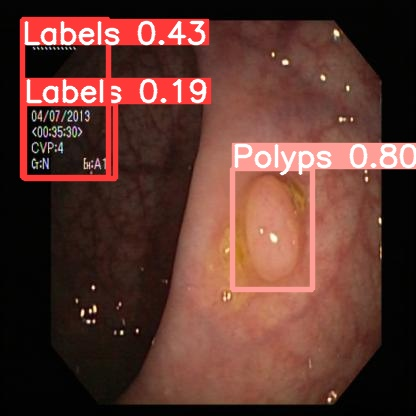

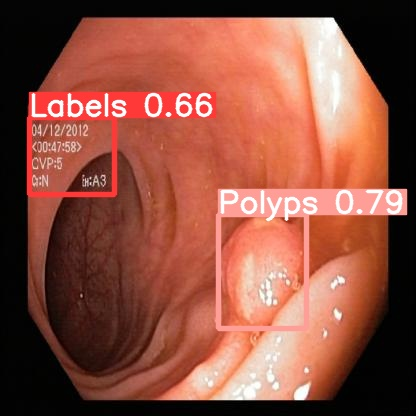

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/drive/MyDrive/yolov9/runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path))